In [3]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import amd
import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
curr_path = Path().absolute()
dataset_parent = curr_path.parent.parent / 'datasets' / 'similarity-datasets'

element = 'Si'
data_key = f'{element}_O_only'
cif_path = dataset_parent / 'CIFs' / f'{data_key}'
# get a list of cif files
cif_list = [entry for entry in cif_path.iterdir() if entry.is_file()]
cif_list.sort()
print(element, len(cif_list))

Si 343


In [8]:
# load csv files (distance matrix)
# compute correlations between different measures
# get a list of csv files
curr_path = Path().absolute()
csv_folder = curr_path.parent / 'figures' / 'poster_amd' / 'group_corr'
method = 'AMD'
file_path = csv_folder / f'SiTiZr_{method}_all_combined_100.csv'

dm = pd.read_csv(file_path).iloc[:, 1:] # drop index column

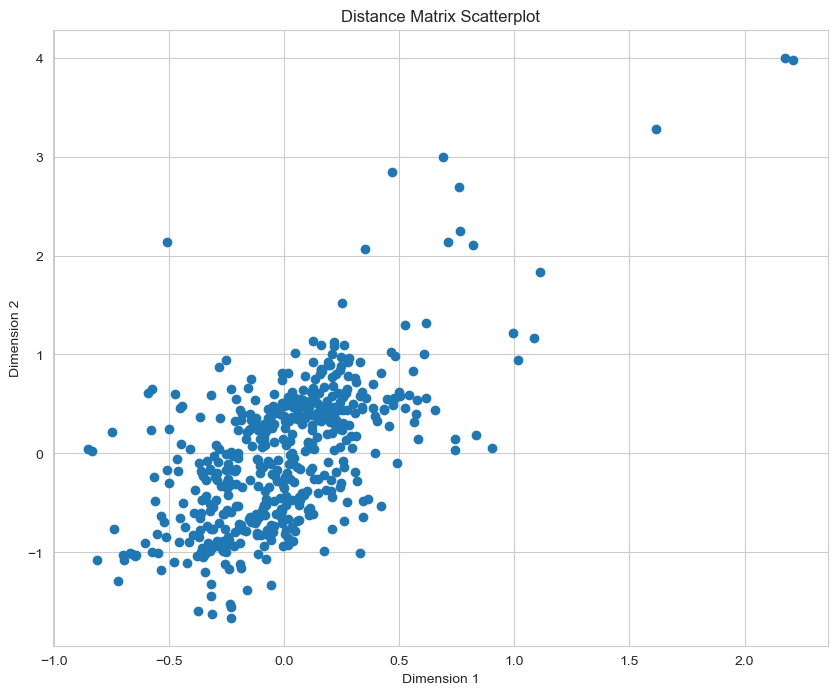

In [9]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordinates = mds.fit_transform(dm)
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1])
plt.title('Distance Matrix Scatterplot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

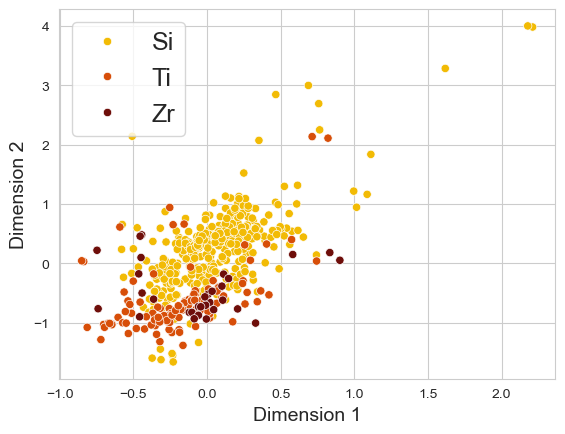

In [10]:
figure_write_folder = curr_path.parent / 'figures' / 'poster_amd'
short_key = 'all_combined'
k = 100

df_points = pd.DataFrame(coordinates)
df_points['formula'] = list(dm.columns)
df_points['element'] = df_points['formula'].apply(lambda x: x[:2])
df_points.to_csv(figure_write_folder / f'SiTiZr_scatter_coordinates_{method}_{short_key}.csv')
# df_points['element'].value_counts()
# custom colormap
color_map = {'Si': '#F2BB05', 'Ti': '#D74E09', 'Zr': '#6E0E0A'}

sns.scatterplot(df_points, x=0, y=1, hue='element', palette=color_map)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.legend(fontsize=18)

plt.savefig(figure_write_folder / f'SiTiZr_scatter_{method}_{short_key}_{k}.png', dpi=300)
plt.savefig(figure_write_folder / f'SiTiZr_scatter_{method}_{short_key}_{k}.svg', transparent=True)
plt.show()

# can ignore the following

In [ ]:
# already ran this! (498 structures)
methods = ['AMD', 'PDD']
k = 100 # default
elements = ['Si', 'Ti', 'Zr']
short_key = 'all_combined'

figure_write_folder = curr_path.parent / 'figures' / 'poster_amd'
figure_write_folder.mkdir(parents=True, exist_ok=True) # create the folder if it doesn't exist

cif_list_combined = []
for element in elements:
    data_key = f'{element}_O_only'
    cif_path = dataset_parent / 'CIFs' / f'{data_key}'
    # get a list of cif files
    cif_list = [entry for entry in cif_path.iterdir() if entry.is_file()]
    cif_list.sort()
    for cif_path in cif_list:
        cif_list_combined.append(cif_path)

for method in methods:
    dm = amd.compare(cif_list_combined, cif_list_combined, by=method, k=k)
    # save data
    dm.to_csv(figure_write_folder / f'SiTiZr_{method}_{short_key}_{k}.csv')
    # plot heatmap
    mask = np.triu(np.ones_like(dm, dtype=bool)) # make a lower triangular mask
    # Plot the heatmap with the mask
    plt.figure(figsize=(10,8))
    sns.heatmap(dm, annot=False, vmin=0, vmax=1.2)
    plt.grid(False)
    plt.title(f'Si/Ti/Zr-O ({method}, k={k})')
    plt.tight_layout()
    plt.savefig(figure_write_folder / f'SiTiZr_{method}_{short_key}_{k}.png', dpi=300)
    plt.savefig(figure_write_folder / f'SiTiZr_{method}_{short_key}_{k}.svg', transparent=True)
    plt.show()